In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import auc, roc_curve, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier 
from heapq import nsmallest
from sklearn.naive_bayes import GaussianNB

# Задание1 #

Подготовьте данные, уберите аномалии. Разбейте выборку, проведите обучение моделей (KNN, DTC, NB, SVM, LR), поищите гиперпараметры, оцените их качество работы. Свои действия снабжайте пояснениями.

In [53]:
df = pd.read_csv('classification_preprocessed.csv')
df = df.dropna() # удаление пропусков
df.head()

,Unnamed: 0,age,Medu,Fedu,guardian_,traveltime,studytime,failures,famrel,freetime,...,Fjob_,reason_,schoolsup_,famsup_,paid_,activities_,nursery_,higher_,internet_,romantic_
0,0,18,4,4,1,2,2,0,4,3,...,4,0,1,0,0,0,1,1,0,0
1,1,17,1,1,0,1,2,0,5,3,...,2,0,0,1,0,0,0,1,1,0
2,2,15,1,1,1,1,2,3,4,3,...,2,2,1,0,1,0,1,1,1,0
3,3,15,4,2,1,1,3,0,3,2,...,3,1,0,1,1,1,1,1,1,1
4,4,16,3,3,0,1,2,0,4,3,...,2,1,0,1,1,0,1,1,0,0


# Очистка данных от аномалий & балансировка выборки #

In [54]:
df.describe() #можно заметить,
#что в данном наборе данных выбросы незначительно отклоняются от 
#основных значений, исключения составляют abscens G1 G2 G3 а так же age  

,Unnamed: 0,age,Medu,Fedu,guardian_,traveltime,studytime,failures,famrel,freetime,...,Fjob_,reason_,schoolsup_,famsup_,paid_,activities_,nursery_,higher_,internet_,romantic_
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,197.000000,16.696203,2.749367,2.521519,0.853165,1.448101,2.035443,0.334177,3.944304,3.235443,...,2.281013,1.255696,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177
std,114.170924,1.276043,1.094735,1.088201,0.536684,0.697505,0.839240,0.743651,0.896659,0.998862,...,0.863542,1.208236,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300
min,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.500000,16.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,197.000000,17.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,4.000000,3.000000,...,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,295.500000,18.000000,4.000000,3.000000,1.000000,2.000000,2.000000,0.000000,5.000000,4.000000,...,3.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,394.000000,22.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,5.000000,5.000000,...,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

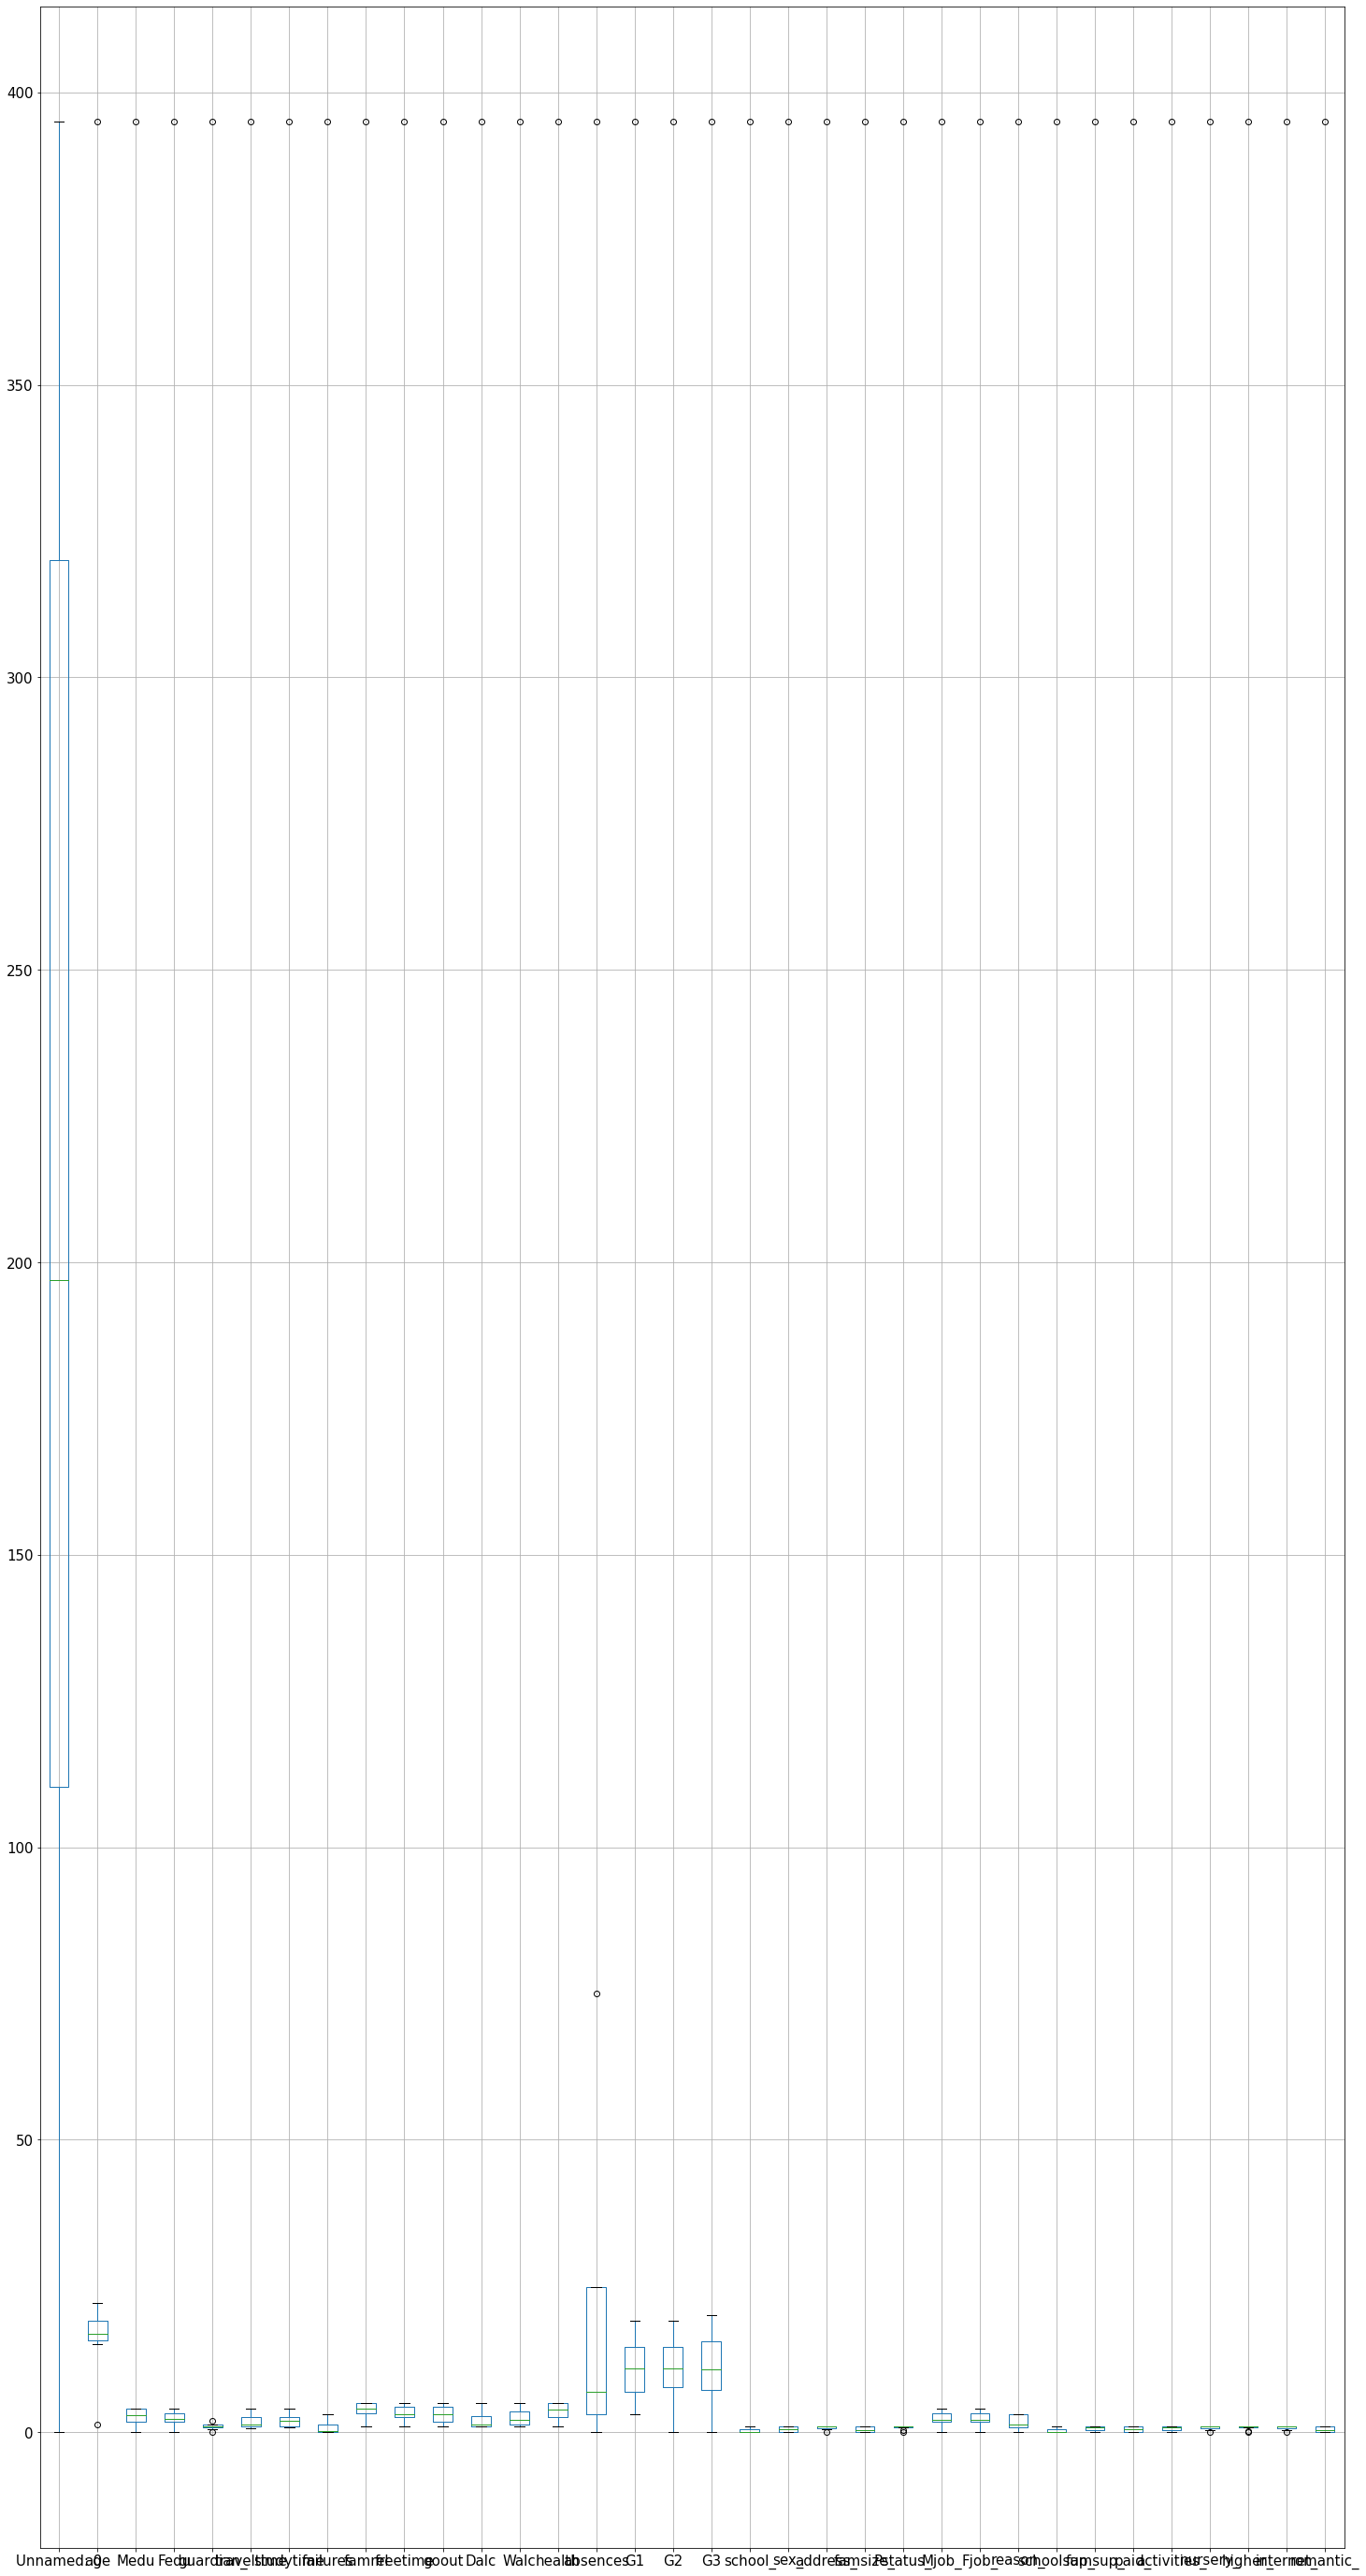

In [55]:
df.describe().boxplot(figsize = (25, 50), fontsize = 15)

Легко заметить, что в каждом из параметров есть значения, сильно выбивающиеся из ряда - выбросы. Удаялим все значения, не входщие в "ящик с усами"

In [56]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#разделение на тестовую и тренировочную выборки 70+30=100

In [58]:
scaler = StandardScaler()#стандартизация данных
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 1.31071622,  0.9879047 , -1.6237068 , ...,  0.4988675 ,
        -4.32600112,  0.43549417],
       [ 1.07300736,  0.9879047 ,  1.12563723, ...,  0.4988675 ,
         0.23116037,  0.43549417],
       [ 1.60124928,  0.9879047 , -0.70725879, ...,  0.4988675 ,
         0.23116037, -2.29624199],
       ...,
       [-0.75823131, -0.61598764,  0.20918922, ...,  0.4988675 ,
         0.23116037,  0.43549417],
       [-0.58215067, -0.61598764,  0.20918922, ..., -2.0045403 ,
         0.23116037,  0.43549417],
       [ 0.47433318,  1.78985087,  1.12563723, ...,  0.4988675 ,
         0.23116037,  0.43549417]])

# KNN

In [59]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5) #обучение алгоритмом  "к ближайших соседей"
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test) # без понятия что здесь происходит, надо почитать, но это относиться к методу "к ближайших соседей"
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

[[10 20  0]
 [ 4 76  0]
 [ 0  7  2]]
              precision    recall  f1-score   support

           0       0.71      0.33      0.45        30
           1       0.74      0.95      0.83        80
           2       1.00      0.22      0.36         9

    accuracy                           0.74       119
   macro avg       0.82      0.50      0.55       119
weighted avg       0.75      0.74      0.70       119



# Классификатор дерева решений (Decision Tree Classifier)

Этот классификатор разбивает данные на всё меньшие и меньшие подмножества на основе разных критериев, т. е. у каждого подмножества своя сортирующая категория. С каждым разделением количество объектов определённого критерия уменьшается.

Классификация подойдёт к концу, когда сеть дойдёт до подмножества только с одним объектом. Если объединить несколько подобных деревьев решений, то получится так называемый Случайный Лес (англ. Random Forest).
https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

In [61]:
# https://scikit-learn.org/stable/modules/tree.html
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [62]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30  0  0]
 [ 0 80  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00         9

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



# Наивный байесовский классификатор (Naive Bayes)

Такой классификатор вычисляет вероятность принадлежности объекта к какому-то классу. Эта вероятность вычисляется из шанса, что какое-то событие произойдёт, с опорой на уже на произошедшие события.

Каждый параметр классифицируемого объекта считается независимым от других параметров.

https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/

In [63]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [64]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30  0  0]
 [ 0 80  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00         9

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119



# Метод опорных векторов (Support Vector Machines)

Работа метода опорных векторов заключается в рисовании линии между разными кластерами точек, которые нужно сгруппировать в классы. С одной стороны линии будут точки, принадлежащие одному классу, с другой стороны — к другому классу.

Классификатор будет пытаться увеличить расстояние между рисуемыми линиями и точками на разных сторонах, чтобы увеличить свою «уверенность» определения класса. Когда все точки построены, сторона, на которую они падают — это класс, которому эти точки принадлежат.

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [65]:
# https://scikit-learn.org/stable/modules/svm.html
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [66]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28  2  0]
 [ 0 80  0]
 [ 0  5  4]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.92      1.00      0.96        80
           2       1.00      0.44      0.62         9

    accuracy                           0.94       119
   macro avg       0.97      0.79      0.85       119
weighted avg       0.95      0.94      0.93       119



# Логистическая регрессия (Logistic Regression)

In [67]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [68]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30  0  0]
 [ 0 80  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.99      1.00      0.99        80
           2       1.00      0.89      0.94         9

    accuracy                           0.99       119
   macro avg       1.00      0.96      0.98       119
weighted avg       0.99      0.99      0.99       119



In [69]:
from sklearn.linear_model import Perceptron

clf = Perceptron()
clf.fit(X_train, y_train)

Perceptron()

# Поиск гиперпараметров

In [70]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

parameters = { 'n_neighbors': np.arange(1, 21, 1) }

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
clf.best_params_
clf.cv_results_

{'mean_fit_time': array([0.00039868, 0.00019937, 0.00099649, 0.00039911, 0.00019951,
        0.00039887, 0.00039887, 0.00039892, 0.00059838, 0.00019946,
        0.00039902, 0.00059752, 0.00039897, 0.00019946, 0.00039907,
        0.00019951, 0.0001996 , 0.00019946, 0.00019937, 0.00039887]),
 'std_fit_time': array([4.88285637e-04, 3.98731232e-04, 1.38693233e-06, 4.88811606e-04,
        3.99017334e-04, 4.88519238e-04, 4.88519285e-04, 4.88577633e-04,
        4.88577656e-04, 3.98921967e-04, 4.88694433e-04, 4.87879787e-04,
        4.88636085e-04, 3.98921967e-04, 4.88752840e-04, 3.99017334e-04,
        3.99208069e-04, 3.98921967e-04, 3.98731232e-04, 4.88519238e-04]),
 'mean_score_time': array([0.00219378, 0.00219402, 0.00199451, 0.00199442, 0.00179548,
        0.00199475, 0.00199461, 0.00199461, 0.00199442, 0.0017951 ,
        0.0015965 , 0.00199471, 0.00219412, 0.00219402, 0.00159574,
        0.00179524, 0.00219412, 0.00219426, 0.00189629, 0.00159583]),
 'std_score_time': array([3.97992430e-

In [71]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(clf.score(X_test, y_test))

[[12 18  0]
 [ 2 77  1]
 [ 0  8  1]]
              precision    recall  f1-score   support

           0       0.86      0.40      0.55        30
           1       0.75      0.96      0.84        80
           2       0.50      0.11      0.18         9

    accuracy                           0.76       119
   macro avg       0.70      0.49      0.52       119
weighted avg       0.76      0.76      0.72       119

0.7563025210084033


# Задание 2

In [72]:
from scipy.stats import mode

In [73]:
Loss = ({'model' : [], 'test_accuracy' : [], 'test_recall' :[] , 'test_auc' :[]}) # хранилище метрик качества
df_Loss = pd.DataFrame(Loss)

In [74]:
dataset_2 = df.drop(['age', 'Medu', 'Fedu', 'guardian_', 'traveltime',
                         'studytime', 'failures', 'famrel', 'freetime',
                         'goout', 'Dalc', 'Walc',  'health', 'absences',
                         'G1', 'G2', 'G3', 'school_', 'sex_',   'address_',
                         'famsize_', 'Pstatus_', 'Mjob_', 'Fjob_', 'reason_',
                         'schoolsup_', 'famsup_', 'paid_', 'activities_', 'nursery_',
                         'higher_', 'internet_', 'romantic_'], axis=1)

In [75]:
X = dataset_2.iloc[:, :-1].values
y = dataset_2

In [76]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [77]:
def loss_func(df, model, y_test, y_pred):  # оценка качества модели
  te_ac = accuracy_score(y_test, y_pred).round(4)
  te_rec = recall_score(y_test, y_pred).round(4)
  te_auc = roc_auc_score(y_test, y_pred).round(4)
  new_row = {'model' : model, 'test_accuracy' : te_ac, 'test_recall' : te_rec, 'test_auc' : te_auc}
  print("model: {0}".format(model), "test_accuracy: {0}".format(te_ac), "test_recall: {0}".format(te_rec), "test_auc: {0}".format(te_auc), sep='\n')

# KNN

1. Выяснить соответствующее метрику расстояния для расчета расстояния между точками

2. Сохранить расстояние в массиве и рассортировать его

3. Выберите первые элементы K в отсортированном списке

4. Выполните голосование большинства, и класс с максимальным количеством вхождений будет назначен в качестве нового класса точки данных для классификации.

In [78]:
def euclidian_metric(x, y):
    return np.sqrt(np.sum((x - y)**2))

In [79]:
def predict(x_train, y, x_input, k):
    op_labels = []
    y = np.array(y)
    #Перебрать точки для классификации
    for item in x_input:
        point_dist = []
        
        for j in range(len(x_train)): 
            distances = euclidian_metric(np.array(x_train[j,:]) , item) 
            # получение расстояния
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
        
        #Сортировка массива с сохранением индекса и сохранение первых K точек данных
        dist = np.argsort(point_dist)[:k] #Возвращает индексы, которые будут сортировать массив
        
        # Метки K точек данных сверху
        labels = y[dist]
        
        # голосование 
        lab = mode(labels) #Возвращает наиболее часто встречающееся значение
        lab = lab.mode[0]
        op_labels.append(lab)

    return op_labels

In [80]:
y_pred_knn = predict(X_train, y_train, X_test , 21)

In [81]:
loss_func(df_Loss, "KNN", y_test, y_pred_knn) # y_cl

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

# Наивный байес

In [48]:
#Разбиваем выборку на обучающую тестовую
X = dataset_2.drop(columns=['y_cl'])
y = dataset_2['y_cl']
(X_train, X_test, 
y_train, y_test) = train_test_split(X, y, 
                                     test_size=0.3, 
                                     random_state=dataset_2.shape[0], stratify = y)

KeyError: "['y_cl'] not found in axis"

теорема байеса позволяет рассчитать апостериорную вероятность

# P(A|B) = P(B|A) * P(A)/P(B)

Здесь:

P(A|B) – вероятность наступления события А, при условии, что событие В уже случилось;
P(B|A) – вероятность наступления события В, при условии, что событие А уже случилось. Сейчас это выглядит как какой-то замкнутый круг, но мы скоро поймем, почему формула работает;
P(A) – априорная (безусловная) вероятность наступления события А;
P(B) – априорная (безусловная) вероятность наступления события В.

In [49]:
means = X_train.groupby(y_train).apply(np.mean)
standards = X_train.groupby(y_train).apply(np.std)
 
#Априорная вероятность - вероятность, присвоенная событию при отсутствии знания,
#поддерживающего его наступление
probs = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]
op_labels = []
#каждый элемент в тестовой части данных
for elem in range(X_test.shape[0]):
   p = {}
   #для каждого возможного класса
   for classes in np.unique(y_train):
       #априорная вероятность взятого ранее класса
       p[classes] = probs.iloc[classes]
       #для каждого столбца в датасете
       for index, parametres in enumerate(X_test.iloc[elem]):
           #умножаем вероятность того, что данное значение столбца
           #будет принадлежать распределению для выбранного класса
           p[classes] *= np.exp((-((parametres - means.iloc[classes, index])/standards.iloc[classes, index])**2)/2)/((2*3.1416)**0.5) # плотность вероятности для нормы
   op_labels.append(pd.Series(p).values.argmax())

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [50]:
loss_func(df_Loss, "Naive Bayes", y_test, op_labels)

NameError: name 'op_labels' is not defined

# Итоги

In [51]:
plt.figure(figsize = (15,10))
models = ['KNN', 'Naive Bayes']
y_native = []
y_native.append(y_pred_knn)
y_native.append(y_pred_NB)
for n in range(len(y_native)):
    fpr, tpr, _ = roc_curve(y_test, y_native[n])
    auc = roc_auc_score(y_test, y_native[n])
    lw = 1.5
    plt.plot(fpr,tpr,label=str(models[n])+" AUC="+str(auc.round(4)),lw=lw)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=0)
plt.show()

NameError: name 'y_pred_NB' is not defined

<Figure size 1080x720 with 0 Axes>